-------------------IQR OUTLIER DETECTION-------------------
DATA BEFORE FILTERING
OUTLIERS :
Indexes of rows with Outliers =  [483, 711, 983, 1752, 1864, 2089, 2482, 2498, 2540, 3283, 4006, 4171, 4172, 4173, 4174, 4202, 4593, 4801, 4998, 5120, 5279, 5395, 5751, 7125, 7126, 7127, 7341, 7421, 7452, 7454, 7455, 7458, 7470, 7471, 7527, 7967, 7968, 7969, 7970, 7971, 7972, 8042, 8064, 8084, 8186, 8253, 9055, 9176, 9353, 9376, 9647, 9726, 9919]
Values of Outliers =  [0, 6, 0, 0, 8, 0, 0, 0, 0, 0, 0, 6, 6, 6, 6, 0, 0, 0, 0, 0, 0, 0, 0, 8, 8, 8, 0, 0, 0, 0, 0, 0, 0, 0, 0, 8, 8, 8, 8, 8, 8, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
DATA AFTER FILTERING
OUTLIERS :
Indexes of rows with Outliers =  []
Values of Outliers =  []


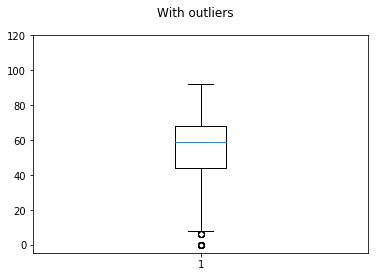

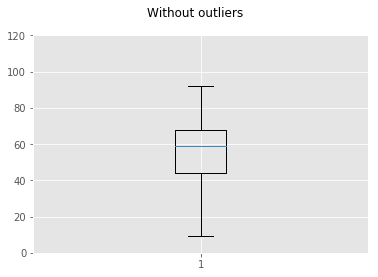

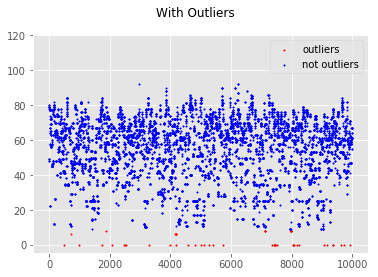

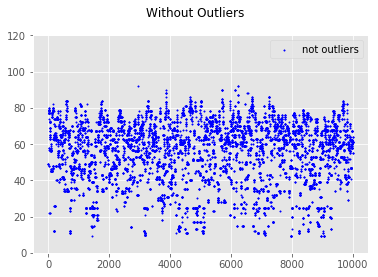



kde plot of data with and without outliers
RED - Uncleaned Data
BLUE - Cleaned Data


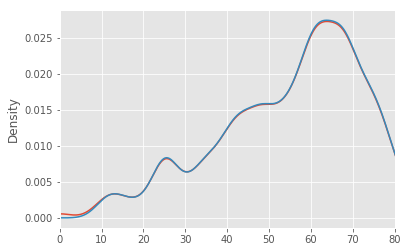



-----------------------------------------------------------------

-------------------ZSCORE OUTLIER DETECTION-------------------
DATA BEFORE FILTERING
OUTLIERS :
Indexes of rows with Outliers =  [483, 711, 983, 1426, 1752, 1864, 2089, 2482, 2498, 2540, 3283, 4006, 4171, 4172, 4173, 4174, 4202, 4593, 4801, 4998, 5120, 5279, 5395, 5751, 7125, 7126, 7127, 7341, 7421, 7452, 7454, 7455, 7458, 7470, 7471, 7527, 7960, 7961, 7962, 7963, 7964, 7965, 7966, 7967, 7968, 7969, 7970, 7971, 7972, 8042, 8064, 8084, 8186, 8253, 8968, 8969, 8970, 9042, 9043, 9044, 9045, 9046, 9055, 9176, 9353, 9376, 9647, 9726, 9919]
Values of Outliers =  [0, 6, 0, 9, 0, 8, 0, 0, 0, 0, 0, 0, 6, 6, 6, 6, 0, 0, 0, 0, 0, 0, 0, 0, 8, 8, 8, 0, 0, 0, 0, 0, 0, 0, 0, 0, 9, 9, 9, 9, 9, 9, 9, 8, 8, 8, 8, 8, 8, 0, 0, 0, 0, 0, 9, 9, 9, 9, 9, 9, 9, 9, 0, 0, 0, 0, 0, 0, 0]
DATA AFTER FILTERING
OUTLIERS :
Indexes of rows with Outliers =  [706, 707, 708, 709, 3150, 3151, 3152, 3153, 3154, 3155, 3156, 3167, 3168, 3169, 3170, 3171, 31

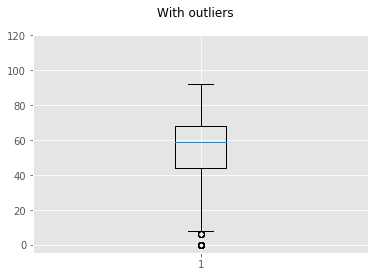

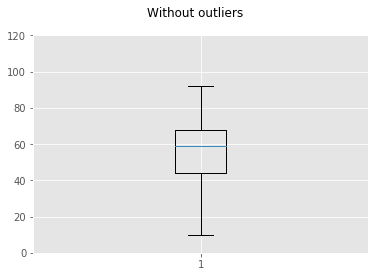

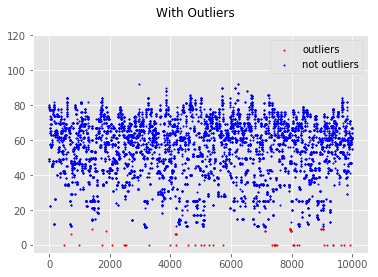

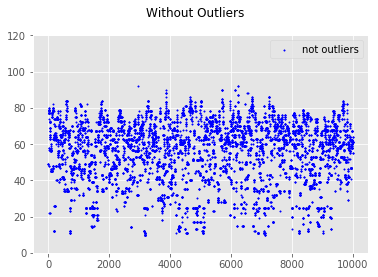



kde plot of data with and without outliers
RED - Uncleaned Data
BLUE - Cleaned Data


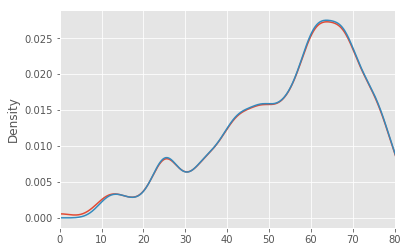



----------------------------------------------------------------------

-------------------MODIFIED ZSCORE OUTLIER DETECTION-------------------
DATA BEFORE FILTERING
OUTLIERS :
Indexes of rows with Outliers =  [483, 707, 708, 709, 710, 711, 983, 1426, 1752, 1864, 2089, 2482, 2498, 2540, 3160, 3161, 3162, 3163, 3164, 3165, 3166, 3177, 3178, 3179, 3180, 3181, 3182, 3183, 3184, 3185, 3186, 3187, 3188, 3283, 4006, 4171, 4172, 4173, 4174, 4179, 4202, 4531, 4532, 4538, 4539, 4540, 4541, 4542, 4543, 4544, 4593, 4801, 4998, 5066, 5067, 5068, 5069, 5070, 5071, 5072, 5120, 5279, 5395, 5751, 6872, 6873, 6874, 6875, 6876, 6877, 6878, 6879, 6880, 6881, 6882, 6883, 6884, 7076, 7077, 7078, 7079, 7080, 7081, 7082, 7083, 7084, 7085, 7091, 7110, 7111, 7112, 7122, 7123, 7124, 7125, 7126, 7127, 7341, 7421, 7452, 7454, 7455, 7458, 7470, 7471, 7527, 7960, 7961, 7962, 7963, 7964, 7965, 7966, 7967, 7968, 7969, 7970, 7971, 7972, 8042, 8064, 8084, 8186, 8236, 8237, 8238, 8239, 8240, 8253, 8968, 8969, 8970, 90

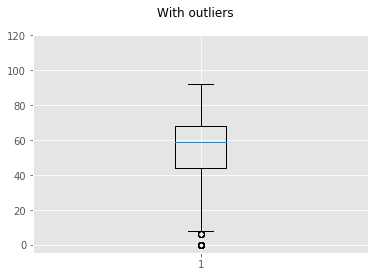

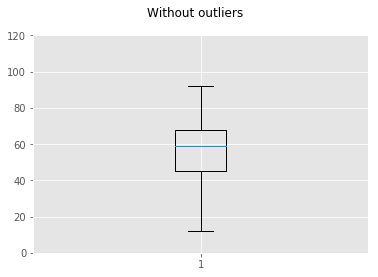

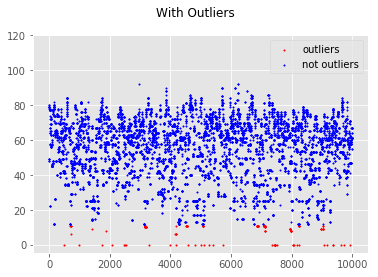

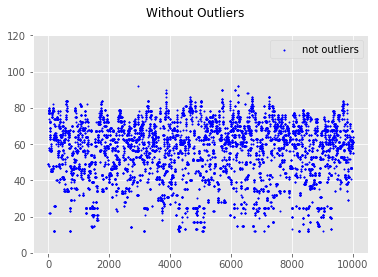



kde plot of data with and without outliers
RED - Uncleaned Data
BLUE - Cleaned Data


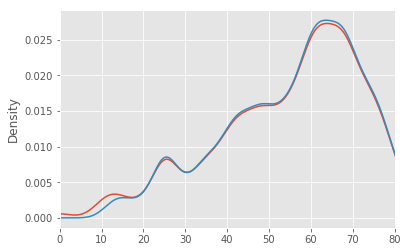



------------------------------------------------------------------------



In [1]:
#OUTLIER DETECTION USING INTER QUARTILE RANGE, Z_SCORE AND MODIFIED Z_SCORE
#Z SCORE is influenced by the outliers itself because 
#the Z_SCORE is calculated using mean and mean of data gets
#influenced by the outliers in the dataset 
#This is where comes MODIFIED_Z_SCORE which is more robust 
#as it is calculated using median of the data. Therefore, the
#MODIFIED_Z_SCORE is less influenced by outliers when compared 
#to the standard Z_SCORE



import pandas as pd
from statistics import stdev
import matplotlib.pyplot as plt

#Function to detect outliers using INTER QUARTILE RANGE and clean the data 
def clean_outliers_IQR(df, basis_column):
    outliers_index = []
    outliers_value = []
    chk = df[basis_column]
    first_quartile = chk.quantile(0.25)
    third_quartile = chk.quantile(0.75)
    inter_quartile_range = third_quartile - first_quartile
    lower_threshold = first_quartile - (1.5*inter_quartile_range)
    upper_threshold = third_quartile + (1.5*inter_quartile_range)
    for index, value in enumerate(chk):
        if (not(lower_threshold<value<upper_threshold)):
            outliers_index.append(index)
            outliers_value.append(value)
    filtered_df = df.drop(df.index[outliers_index])
    return outliers_index, outliers_value, filtered_df    

#Function to detect outliers using Z-SCORE and clean the data 
def clean_outliers_ZSCORE(df, basis_column):
    outliers_index = []
    outliers_value = []
    chk = df[basis_column]
    threshold = 2.6
    mean = chk.mean()
    standard_deviation = stdev(chk)
    for index, value in enumerate(chk):
        zscore = (abs(value - mean))/standard_deviation        
        if (zscore > threshold):
            outliers_index.append(index)
            outliers_value.append(value)
    filtered_df = df.drop(df.index[outliers_index])
    return outliers_index, outliers_value, filtered_df

#Function to detect outliers using MODIFIEDZSCORE and clean the data 
def clean_outliers_MODIFIEDZSCORE(df, basis_column):
    outliers_index = []
    outliers_value = []
    diff_value_median = []
    chk = df[basis_column]
    threshold = 3
    median = chk.median()
    for value in chk:
        diff_value_median.append(abs(value-median))
    diff_value_median_series = pd.Series(diff_value_median)
    median_absolute_deviation = 1.4296 * diff_value_median_series.median()
    for index, value in enumerate(chk):
        modifiedzscore = (abs(value - median))/median_absolute_deviation        
        if (modifiedzscore > threshold):
            outliers_index.append(index)
            outliers_value.append(value)
    filtered_df = df.drop(df.index[outliers_index])
    return outliers_index, outliers_value, filtered_df

#Function to analyse the data using graphs (showing outliers and cleaned data)
def analysis(df, filtered_df, outliers_index, outliers_value):
    ticks = [0,20,40,60,80,100,120]#defining division on y axis of the graphs
    
    #boxplot with ouliers
    plt.boxplot(df['crossing'])
    plt.suptitle('With outliers')
    plt.yticks(ticks)
    plt.style.use('ggplot')
    plt.show()
    
    #boxplot without ouliers
    plt.boxplot(filtered_df['crossing'])
    plt.suptitle('Without outliers')
    plt.yticks(ticks)
    plt.style.use('ggplot')
    plt.show()
    
    #scatterplot with ouliers
    plt.scatter(outliers_index, outliers_value, label = 'outliers', color = 'r', s = 2)
    plt.scatter(filtered_df['id'], filtered_df['crossing'], color = 'b', s = 2, label = 'not outliers')
    plt.yticks(ticks)
    plt.suptitle('With Outliers')
    plt.style.use('ggplot')
    plt.legend()
    plt.show()

    #scatterplot with ouliers
    plt.scatter(filtered_df['id'], filtered_df['crossing'], color = 'b', s = 2, label = 'not outliers')
    plt.yticks(ticks)
    plt.suptitle('Without Outliers')
    plt.style.use('ggplot')
    plt.legend()
    plt.show()

    #kde plot to show the uncleaned and cleaned data

    print ("")
    print ("")
    print ("kde plot of data with and without outliers")
    print ("RED - Uncleaned Data")
    print ("BLUE - Cleaned Data")
    df.crossing.plot(kind='kde', xlim=(0,80))
    filtered_df.crossing.plot(kind='kde', xlim=(0,80))
    plt.show()
    
#Function to print index and value of outliers in data detected using INTER QUARTILE RANGE
def show_outliers_IQR(df, basis_column):
    outliers_index, outliers_value, _ = clean_outliers_IQR(df, basis_column)
    print ("OUTLIERS :")
    print ("Indexes of rows with Outliers = ",outliers_index)
    print ("Values of Outliers = ",outliers_value)
  
#Function to print index and value of outliers in data detected using ZSCORE   
def show_outliers_ZSCORE(df, basis_column):
    outliers_index, outliers_value, _ = clean_outliers_ZSCORE(df, basis_column)
    print ("OUTLIERS :")
    print ("Indexes of rows with Outliers = ",outliers_index)
    print ("Values of Outliers = ",outliers_value) 

#Function to print index and value of outliers in data detected using MODIFIED ZSCORE  
def show_outliers_MODIFIEDZSCORE(df, basis_column):
    outliers_index, outliers_value, _ = clean_outliers_MODIFIEDZSCORE(df, basis_column)
    print ("OUTLIERS :")
    print ("Indexes of rows with Outliers = ",outliers_index)
    print ("Values of Outliers = ",outliers_value) 


df = pd.read_csv('players_10k.csv')
basis_column = 'crossing'#column used to detect the outliers

#Just executing the functions
print("-------------------IQR OUTLIER DETECTION-------------------")
print("DATA BEFORE FILTERING")
show_outliers_IQR(df, basis_column)
outliers_index1, outliers_value1, filtered_df1 = clean_outliers_IQR(df, basis_column)
print("DATA AFTER FILTERING")
show_outliers_IQR(filtered_df1, basis_column)
analysis(df, filtered_df1, outliers_index1, outliers_value1)
print("")
print("")
print("-----------------------------------------------------------------")
print("")

#Just executing the functions
print("-------------------ZSCORE OUTLIER DETECTION-------------------")
print("DATA BEFORE FILTERING")
show_outliers_ZSCORE(df, basis_column)
outliers_index2, outliers_value2, filtered_df2 = clean_outliers_ZSCORE(df, basis_column)
print("DATA AFTER FILTERING")
show_outliers_ZSCORE(filtered_df2, basis_column)
analysis(df, filtered_df2, outliers_index2, outliers_value2)
print("")
print("")
print("----------------------------------------------------------------------")
print("")

#Just executing the functions
print("-------------------MODIFIED ZSCORE OUTLIER DETECTION-------------------")
print("DATA BEFORE FILTERING")
show_outliers_MODIFIEDZSCORE(df, basis_column)
outliers_index3, outliers_value3, filtered_df3 = clean_outliers_MODIFIEDZSCORE(df, basis_column)
print("DATA AFTER FILTERING")
show_outliers_MODIFIEDZSCORE(filtered_df3, basis_column)
analysis(df, filtered_df3, outliers_index3, outliers_value3)
print("")
print("")
print("------------------------------------------------------------------------")
print("")
